# Histogram & Q-Q plot

In [15]:
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [16]:
code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

# 週足で過去 3 年分のデータを取得
df = ticker.history(period='3y', interval='1wk')

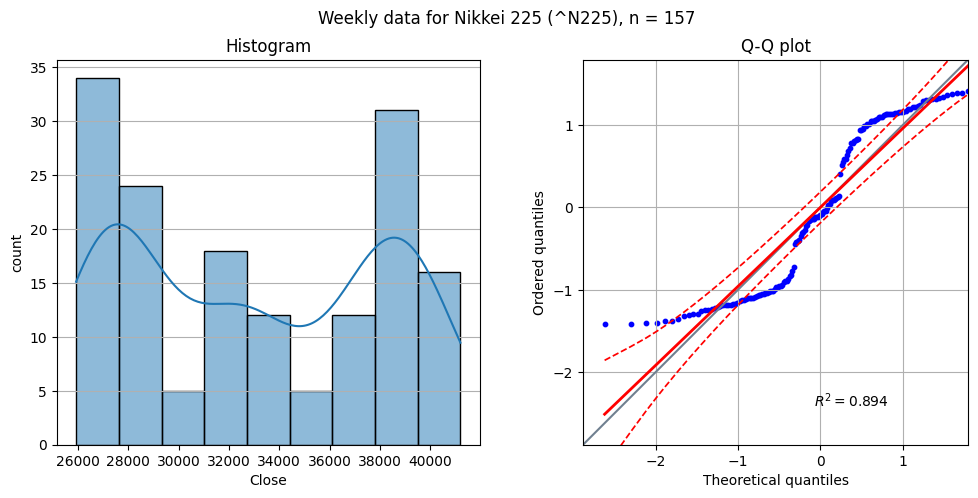

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ヒストグラム
sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram')

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot')
axes[1].grid()

plt.suptitle('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
#plt.subplots_adjust(wspace=0.25)
plt.savefig('0_report_weekly_histogram_qqplot_%s.png' % code)
plt.show()